# Creating Lousiana 2015-2025 Flood Dataset
### Sources: 
- National Oceanic and Atmospheric Administration (NOAA)'s Storm Events Database
- U.S Climate Resilience Toolkit - Applied Climate Information System

In [343]:
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

raw_data_path = "raw_data"

# Import the raw data
df_floods = pd.read_csv(os.path.join(raw_data_path,'louisiana_floods_2015-2025.csv'))
for col in df_floods.columns:
    df_floods.rename(columns={col: col.lower()}, inplace=True)
df_floods.head()

,event_id,cz_name_str,begin_location,begin_date,begin_time,event_type,magnitude,tor_f_scale,deaths_direct,injuries_direct,...,end_location,end_date,end_time,begin_lat,begin_lon,end_lat,end_lon,event_narrative,episode_narrative,absolute_rownumber
0,577286,RED RIVER PAR.,HOWARD,05/18/2015,545,Flood,,,0,0,...,HOWARD,05/31/2015,2359,32.2297,-93.4981,32.2309,-93.4236,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,1
1,577292,NATCHITOCHES PAR.,KING HILL,05/18/2015,815,Flood,,,0,0,...,GRAPPES BLUFF,05/31/2015,2359,31.8986,-93.2774,31.9395,-93.2121,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,2
2,577302,WINN PAR.,ST MAURICE,05/18/2015,815,Flood,,,0,0,...,ST MAURICE,05/31/2015,2359,31.7066,-92.9876,31.7382,-92.9993,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,3
3,577296,GRANT PAR.,MONTGOMERY,05/18/2015,815,Flood,,,0,0,...,HARGIS,05/31/2015,2359,31.7066,-92.9931,31.7201,-92.8619,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,4
4,577284,BOSSIER PAR.,FERRY,05/30/2015,2100,Flood,,,0,0,...,FERRY,05/31/2015,2359,33.0168,-93.8590,33.0185,-93.7717,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,5


In [344]:
df_floods.describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,111.0,7.496041e+05,1.679900e+05,577283.0000,625671.00000,657958.0000,823781.00000,1.197566e+06
begin_time,111.0,1.149964e+03,7.336771e+02,0.0000,600.00000,1300.0000,1800.00000,2.300000e+03
deaths_direct,111.0,7.207207e-02,4.202102e-01,0.0000,0.00000,0.0000,0.00000,4.000000e+00
injuries_direct,111.0,9.009009e-03,9.491580e-02,0.0000,0.00000,0.0000,0.00000,1.000000e+00
damage_property_num,111.0,5.485123e+07,2.357962e+08,0.0000,0.00000,0.0000,500000.00000,1.680000e+09
damage_crops_num,111.0,4.504505e+03,4.745790e+04,0.0000,0.00000,0.0000,0.00000,5.000000e+05
episode_id,111.0,1.243133e+05,2.688041e+04,96046.0000,104446.00000,110040.0000,136353.00000,1.935170e+05
cz_fips,111.0,6.109009e+01,3.587898e+01,1.0000,25.00000,67.0000,98.00000,1.270000e+02
injuries_indirect,111.0,0.000000e+00,0.000000e+00,0.0000,0.00000,0.0000,0.00000,0.000000e+00
deaths_indirect,111.0,9.009009e-03,9.491580e-02,0.0000,0.00000,0.0000,0.00000,1.000000e+00


In [345]:
for i, col in enumerate(df_floods.columns):
    print(f"{i}: {col}")

0: event_id
1: cz_name_str
2: begin_location
3: begin_date
4: begin_time
5: event_type
6: magnitude
7: tor_f_scale
8: deaths_direct
9: injuries_direct
10: damage_property_num
11: damage_crops_num
12: state_abbr
13: cz_timezone
14: magnitude_type
15: episode_id
16: cz_type
17: cz_fips
18: wfo
19: injuries_indirect
20: deaths_indirect
21: source
22: flood_cause
23: tor_length
24: tor_width
25: begin_range
26: begin_azimuth
27: end_range
28: end_azimuth
29: end_location
30: end_date
31: end_time
32: begin_lat
33: begin_lon
34: end_lat
35: end_lon
36: event_narrative
37: episode_narrative
38: absolute_rownumber


In [346]:
df_floods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             111 non-null    int64  
 1   cz_name_str          111 non-null    object 
 2   begin_location       111 non-null    object 
 3   begin_date           111 non-null    object 
 4   begin_time           111 non-null    int64  
 5   event_type           111 non-null    object 
 6   magnitude            111 non-null    object 
 7   tor_f_scale          111 non-null    object 
 8   deaths_direct        111 non-null    int64  
 9   injuries_direct      111 non-null    int64  
 10  damage_property_num  111 non-null    int64  
 11  damage_crops_num     111 non-null    int64  
 12  state_abbr           111 non-null    object 
 13  cz_timezone          111 non-null    object 
 14  magnitude_type       111 non-null    object 
 15  episode_id           111 non-null    int

In [347]:
important_cols = ['begin_date', 'cz_name_str']
df_floods_filtered = df_floods[important_cols].copy()
df_floods_filtered.rename(columns={'cz_name_str':'County', 'begin_date':'Date'}, inplace=True)
df_floods_filtered['Flood'] = 1
df_floods_filtered.head()

,Date,County,Flood
0,05/18/2015,RED RIVER PAR.,1
1,05/18/2015,NATCHITOCHES PAR.,1
2,05/18/2015,WINN PAR.,1
3,05/18/2015,GRANT PAR.,1
4,05/30/2015,BOSSIER PAR.,1


In [348]:
# Investigate the date range of the data
df_floods_filtered.loc[:, 'Date'] = pd.to_datetime(df_floods_filtered['Date']).dt.date
print(f"Date range: {df_floods_filtered['Date'].min()} to {df_floods_filtered['Date'].max()}")
flood_dates = df_floods_filtered['Date'].unique()
print(f"Number of unique flood dates: {len(flood_dates)}")

Date range: 2015-05-18 to 2024-06-03
Number of unique flood dates: 51


In [349]:
# Group dates by year
df_floods_filtered['Year'] = pd.to_datetime(df_floods_filtered['Date']).dt.year
for year in sorted(df_floods_filtered['Year'].unique()):
    num_floods = df_floods_filtered[df_floods_filtered['Year'] == year].shape[0]
    print(f"Year {year}: {num_floods} flood events")
    print(df_floods_filtered[df_floods_filtered['Year'] == year]['Date'].value_counts())

df_floods_filtered.drop(columns=['Year'], inplace=True)

Year 2015: 14 flood events


Date
2015-06-01    6
2015-05-18    4
2015-05-30    2
2015-10-26    1
2015-10-31    1
Name: count, dtype: int64
Year 2016: 46 flood events
Date
2016-03-11    14
2016-08-14    10
2016-08-13     6
2016-03-10     4
2016-03-12     4
2016-06-12     2
2016-03-13     2
2016-08-12     2
2016-08-15     2
Name: count, dtype: int64
Year 2017: 2 flood events
Date
2017-08-30    1
2017-09-01    1
Name: count, dtype: int64
Year 2018: 10 flood events
Date
2018-12-31    2
2018-02-22    1
2018-03-07    1
2018-07-30    1
2018-04-01    1
2018-09-10    1
2018-10-15    1
2018-11-13    1
2018-12-28    1
Name: count, dtype: int64
Year 2019: 19 flood events
Date
2019-01-03    3
2019-05-09    3
2019-01-01    2
2019-01-04    2
2019-04-13    2
2019-06-01    2
2019-04-07    1
2019-05-01    1
2019-04-14    1
2019-05-08    1
2019-05-12    1
Name: count, dtype: int64
Year 2020: 6 flood events
Date
2020-07-15    2
2020-04-19    1
2020-07-01    1
2020-07-05    1
2020-07-28    1
Name: count, dtype: int64
Year 2021: 2 fl

In [350]:
precip_data_path = os.path.join(raw_data_path, 'precip_summaries')
date_list = flood_dates.tolist()

# precip_cols = ['Name', 'ID', 'County', 'Last30Days',
#                 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1',
#                 'SinceOct1']

# for date in date_list:
#     date_str = date.strftime('%Y-%m-%d')
#     precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
#     if not os.path.exists(precip_file):
#         # Create an empty precipitation file if it doesn't exist
#         df_empty = pd.DataFrame(columns=precip_cols)
#         df_empty.to_csv(precip_file, index=False)

# print("Total precipitation files checked/created:", len(date_list))
# print("Number of precipitation files in directory:", len(os.listdir(precip_data_path)))

# for date in date_list[0:1]:
#     date_str = date.strftime('%Y-%m-%d')
#     print(f"Checking precipitation data for {date_str}")
#     precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
#     if os.path.exists(precip_file):
#         df_precip = pd.read_csv(precip_file)
#         print(f"Precipitation data for {date_str}:")
#         print(df_precip.head())
#     else:
#         print(f"No precipitation data found for {date_str}")

In [351]:
# Parishes in the flood data
df_floods_filtered.loc[:, 'County'] = df_floods_filtered['County'].str.replace(' Parish','', regex=False).str.replace('PAR.', 'PARISH').str.replace('ST. ', 'SAINT ')
flood_parishes = df_floods_filtered['County'].sort_values().unique().tolist()

print("Parishes in the flood data:")
print("Total parishes with flood data:", len(flood_parishes))
df_flood_parishes = pd.DataFrame(flood_parishes, columns=['Parish'])
print(df_flood_parishes)

# Parishes in the precipitation data
precip_files = os.listdir(precip_data_path)
sample_precip_file = os.path.join(precip_data_path, precip_files[0])
df_sample_precip = pd.read_csv(sample_precip_file)
precip_parishes = df_sample_precip['County'].str.lstrip().str.upper().sort_values().unique().tolist()

print("Parishes in the precipitation data:")
print("Total parishes with precipitation data:", len(precip_parishes))
df_precip_parishes = pd.DataFrame(precip_parishes, columns=['Parish'])
print(df_precip_parishes)

Parishes in the flood data:
Total parishes with flood data: 45
                     Parish
0             ACADIA PARISH
1              ALLEN PARISH
2          ASCENSION PARISH
3          AVOYELLES PARISH
4         BEAUREGARD PARISH
5            BOSSIER PARISH
6              CADDO PARISH
7          CALCASIEU PARISH
8           CALDWELL PARISH
9            CAMERON PARISH
10         CATAHOULA PARISH
11           DE SOTO PARISH
12  EAST BATON ROUGE PARISH
13      EAST CARROLL PARISH
14          FRANKLIN PARISH
15             GRANT PARISH
16            IBERIA PARISH
17         IBERVILLE PARISH
18   JEFFERSON DAVIS PARISH
19         JEFFERSON PARISH
20          LA SALLE PARISH
21         LAFAYETTE PARISH
22           LINCOLN PARISH
23        LIVINGSTON PARISH
24           MADISON PARISH
25         MOREHOUSE PARISH
26      NATCHITOCHES PARISH
27           ORLEANS PARISH
28          OUACHITA PARISH
29     POINTE COUPEE PARISH
30           RAPIDES PARISH
31         RED RIVER PARISH
32          R

In [352]:
df_precip_full = pd.DataFrame()

for date in date_list:
    date_str = date.strftime('%Y-%m-%d')
    precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
    if os.path.exists(precip_file):
        df_temp = pd.read_csv(precip_file)
        df_temp['Date'] = date
        df_precip_full = pd.concat([df_precip_full, df_temp], ignore_index=True)

# Manipulate the column values as needed
df_precip_full.loc[:, 'County'] = df_precip_full['County'].str.lstrip().str.upper()

# Drop all unnecesssary columns
important_cols = ['Date', 'County', 'Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1'   ]
df_precip = df_precip_full[important_cols]

# Drop any rows where the county is undefined
df_precip = df_precip[df_precip['County'] != '-']

# Drop any rows where the precip data is missing
print("Number of precip summary entries (before filtering): ", df_precip.shape[0])
precip_data_cols = ['Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1']
bad_values = [' T', ' M']
for col in precip_data_cols:
    df_precip = df_precip[~df_precip[col].isin(bad_values)]

# Convert precip data columns to numberic
for col in precip_data_cols:
    df_precip[col] = pd.to_numeric(df_precip[col], errors='raise')
nan_rows = df_precip[df_precip[precip_data_cols].isnull().any(axis=1)]
print("Number of precip summary entries (after filtering): ", df_precip.shape[0])

# Average precipitation values for duplicate Date-County entries
df_precip = df_precip.groupby(['Date', 'County'], as_index=False).mean()
print("Number of precip summary entries (after averaging): ", df_precip.shape[0])

print(f"Combined precipitation data: {df_precip.shape}")

Number of precip summary entries (before filtering):  13028
Number of precip summary entries (after filtering):  11989
Number of precip summary entries (after averaging):  3030
Combined precipitation data: (3030, 8)


In [353]:
# Merge the precip and flood dataframes based on date and parish
print("Original floods recorded: ",df_floods_filtered.shape[0])
df_merged = pd.merge(df_precip, df_floods_filtered, how='left', left_on=['Date', 'County'], right_on=['Date', 'County'])
df_merged['Flood'] = df_merged['Flood'].fillna(0)   # Fill NaN flood values with 0 (no floods on that date in that parish)

print(df_merged['Flood'].value_counts())

print(f"Merged dataframe shape: {df_merged.shape}")
print(df_merged.head())

Original floods recorded:  111
Flood
0.0    2940
1.0     105
Name: count, dtype: int64
Merged dataframe shape: (3045, 9)
         Date             County  Last30Days  Last60Days  Last90Days  \
0  2015-05-18      ACADIA PARISH        7.38   16.050000   20.870000   
1  2015-05-18       ALLEN PARISH        3.33    9.445000   13.540000   
2  2015-05-18   ASCENSION PARISH        5.65   14.084000   19.582000   
3  2015-05-18  ASSUMPTION PARISH        7.91   15.485000   19.310000   
4  2015-05-18   AVOYELLES PARISH        3.43   12.073333   19.466667   

   Last180Days  SinceJan1  SinceOct1  Flood  
0    33.070000  27.500000     41.700    0.0  
1    26.825000  23.485000     31.400    0.0  
2    32.312000  26.312000     36.532    0.0  
3    31.820000  26.130000     36.690    0.0  
4    30.043333  26.643333     35.320    0.0  


In [354]:
# Non-flood data
df_non_flood = df_merged[df_merged['Flood'] == 0]

# Create a random sample of non-flood data (to be removed) to balance the dataset
non_flood_size = 500 # twice the number of flood events
df_non_flood_sample = df_non_flood.sample(n=(df_non_flood.shape[0] - non_flood_size), random_state=42)

# Remove the sampled non-flood data from the merged dataframe
df_balanced = df_merged.drop(df_non_flood_sample.index)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(df_balanced['Flood'].value_counts())

Class distribution after balancing:
Flood
0.0    500
1.0    105
Name: count, dtype: int64


<Axes: >

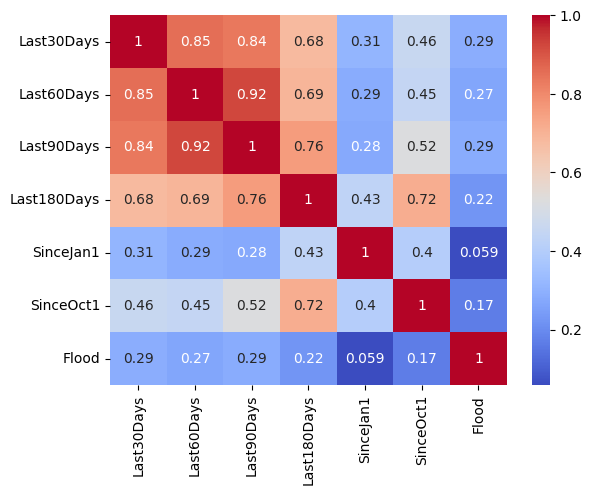

In [355]:
# Simple correlation heatmap
num_cols = ['Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1', 'Flood']
corr = df_balanced[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [356]:
# simple linear regression model to see where we stand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

X = df_balanced[num_cols[:-1]]
y = df_balanced['Flood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
preds = [1 if pred >= 0.5 else 0 for pred in y_pred]
y_pred = preds
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


[[98  2]
 [18  3]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91       100
         1.0       0.60      0.14      0.23        21

    accuracy                           0.83       121
   macro avg       0.72      0.56      0.57       121
weighted avg       0.80      0.83      0.79       121

Accuracy:  0.8347107438016529
F1 Score:  0.23076923076923078
